In [1]:
import numpy as np
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from pygam import LinearGAM
import pygam
import pandas as pd
from pygam import s,l,f,te

In [2]:
# PLEASE READ THE pygam documentation, at least LinearGAM.  It has some odd defaults!

In [3]:
aa = LinearGAM()

In [4]:
LinearGAM?

Init signature:
LinearGAM(
    terms='auto',
    max_iter=100,
    tol=0.0001,
    scale=None,
    callbacks=['deviance', 'diffs'],
    fit_intercept=True,
    verbose=False,
    **kwargs,
)
Docstring:     
Linear GAM

This is a GAM with a Normal error distribution, and an identity link.

Parameters
----------
terms : expression specifying terms to model, optional.

    By default a univariate spline term will be allocated for each feature.

    For example:

    >>> GAM(s(0) + l(1) + f(2) + te(3, 4))

    will fit a spline term on feature 0, a linear term on feature 1,
    a factor term on feature 2, and a tensor term on features 3 and 4.

callbacks : list of str or list of CallBack objects, optional
    Names of callback objects to call during the optimization loop.

fit_intercept : bool, optional
    Specifies if a constant (a.k.a. bias or intercept) should be
    added to the decision function.
    Note: the intercept receives no smoothing penalty.

max_iter : int, optional
    Max

In [5]:
#Set the default figure size for the notebook, so they are not all tiny
matplotlib.rcParams['figure.figsize'] = (18,8)

Grab a data example from ISL.  Wages for males in the central east coast of the US.  Just a demo.

In [6]:
wage = pd.read_csv('wage.csv', index_col=0)
X = wage[['year', 'age', 'education']].values
X[:,-1] = np.unique(X[:,-1], return_inverse=True)[1]
y = wage['wage']

In [7]:
X

array([[2006, 18, 0],
       [2004, 24, 3],
       [2003, 45, 2],
       ...,
       [2005, 27, 0],
       [2005, 27, 2],
       [2009, 55, 1]], dtype=object)

In [8]:
#Let's make a train-test split for fun
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [9]:
#fit = LinearGAM().gridsearch(X_train, y_train, lam = [np.logspace(-2, 3, 10)]*3)
fit = LinearGAM(s(0)+s(1)+f(2)).gridsearch(X_train, y_train, lam = [np.logspace(-2, 3, 5)]*3)


100% (125 of 125) |######################| Elapsed Time: 0:01:17 Time:  0:01:17


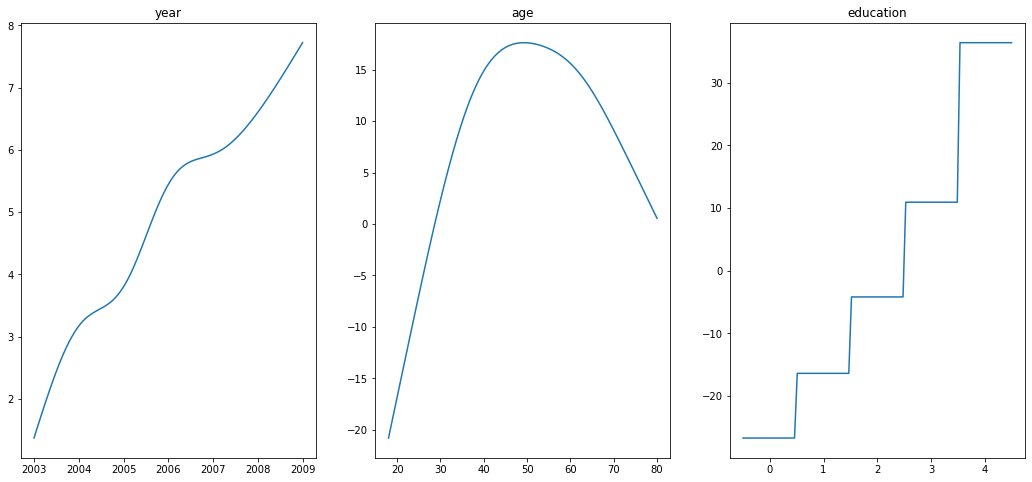

In [10]:
fig, axs = plt.subplots(1, 3)
titles = ['year', 'age', 'education']

for i, ax in enumerate(axs):
    Xfake = fit.generate_X_grid(i)
    pdep, confi = fit.partial_dependence(term = i, X= Xfake, width=.95)

    ax.plot(Xfake[:, i], pdep)
    #ax.plot(XX[:, i], confi[0], c='r', ls='--')
    ax.set_title(titles[i])

plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
yhat = fit.predict(X_test)
mean_squared_error(y_test, yhat)


1200.4392844588083

In [12]:
#Compare to a linear model, does the additive model gain anything?
from sklearn.linear_model import LinearRegression
lmfit = LinearRegression().fit(X_train, y_train)

yhat_lm = lmfit.predict(X_test)
mean_squared_error(y_test, yhat_lm)


1268.0785845812698

# How about in R?

In [13]:
import rpy2
%load_ext rpy2.ipython

In [14]:
%%R 
data(Wage, package='ISLR')

R[write to console]: Error in find.package(package, lib.loc, verbose = verbose) : 
  there is no package called ‘ISLR’

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages




Error in find.package(package, lib.loc, verbose = verbose) : 
  there is no package called ‘ISLR’


In [15]:
%%R 
head(Wage)

R[write to console]: Error in head(Wage) : object 'Wage' not found




Error in head(Wage) : object 'Wage' not found


In [16]:
%%R
library(mgcv)

R[write to console]: Loading required package: nlme

R[write to console]: This is mgcv 1.8-33. For overview type 'help("mgcv-package")'.



In [17]:
%%R
#We need to constrain things a bit because there are so few unique numbers in year 
fit = gam(wage ~ s(age) + s(year,k=2) + education, data=Wage)
plot(fit)

R[write to console]: Error in is.data.frame(data) : object 'Wage' not found




Error in is.data.frame(data) : object 'Wage' not found


In [18]:
%%R 
summary(fit)

R[write to console]: Error in summary(fit) : object 'fit' not found




Error in summary(fit) : object 'fit' not found


In [19]:
%%R
#Make predictions on train set, since we didn't bother splitting for the R version
head(predict(fit, newdata=Wage))

R[write to console]: Error in predict(fit, newdata = Wage) : object 'fit' not found




Error in predict(fit, newdata = Wage) : object 'fit' not found
